In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



Исходный файл: 230400 строк
Новый файл: 130032 строк
Удалено строк: 100368
Сохранено в файл: spectrum_7x3_3a_filtered.dat


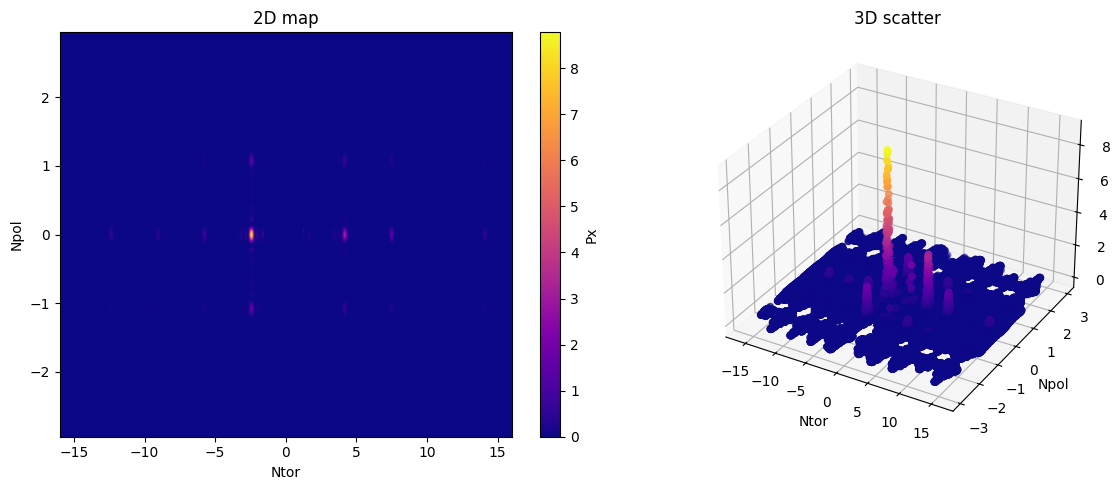

In [12]:
# Замените 'your_file.dat' на имя вашего файла
data = np.loadtxt('spectrum_7x3_3a.dat')

Ntor = data[:, 0]
Npol = data[:, 1]
Px = data[:, 2]

mask = Px >= 1e-6

# Применяем маску ко всем данным
data_filtered = data[mask]

# Обновляем переменные с отфильтрованными данными
Ntor = data_filtered[:, 0]
Npol = data_filtered[:, 1]
Px = data_filtered[:, 2]

np.savetxt('spectrum_7x3_3a_filtered.dat', data_filtered, 
           fmt='%.6f',  # формат чисел (6 знаков после запятой)
           delimiter=' ',  # разделитель
           header='Ntor Npol Px',  # заголовок столбцов
           comments='')  # убираем символ комментария перед заголовком

print(f"Исходный файл: {len(data)} строк")
print(f"Новый файл: {len(data_filtered)} строк")
print(f"Удалено строк: {len(data) - len(data_filtered)}")
print(f"Сохранено в файл: spectrum_7x3_3a_filtered.dat")

# Для 2D-графика
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Создаем сетку для 2D-графика
xi = np.unique(Ntor)
yi = np.unique(Npol)
Xi, Yi = np.meshgrid(xi, yi)
Zi = np.zeros_like(Xi)

for i in range(len(Ntor)):
    x_idx = np.where(xi == Ntor[i])[0][0]
    y_idx = np.where(yi == Npol[i])[0][0]
    Zi[y_idx, x_idx] = Px[i]

plt.imshow(Zi, extent=[xi.min(), xi.max(), yi.min(), yi.max()],
           origin='lower', aspect='auto', cmap='plasma')
plt.xlabel('Ntor')
plt.ylabel('Npol')
plt.title('2D map')
plt.colorbar(label='Px')

# Для 3D-графика
ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(Ntor, Npol, Px, c=Px, cmap='plasma')
ax.set_xlabel('Ntor')
ax.set_ylabel('Npol')
ax.set_zlabel('Px')
ax.set_title('3D scatter')

plt.tight_layout()
plt.show()

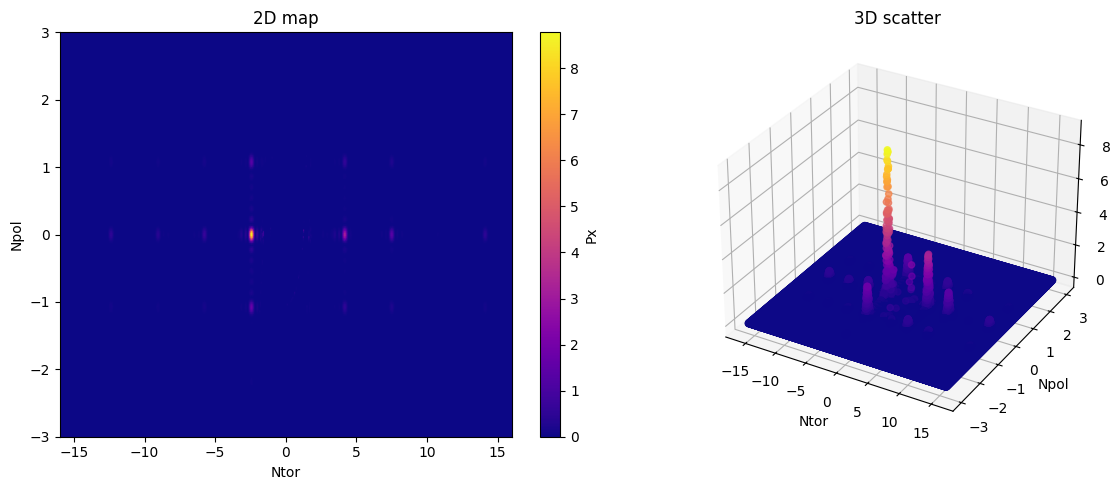

In [14]:
# data = np.loadtxt('spectrum_7x3_3a_filtered.dat')
data = np.loadtxt('spectrum_7x3_3a.dat')
Ntor = data[:, 0]
Npol = data[:, 1]
Px = data[:, 2]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Создаем сетку для 2D-графика
xi = np.unique(Ntor)
yi = np.unique(Npol)
Xi, Yi = np.meshgrid(xi, yi)
Zi = np.zeros_like(Xi)

for i in range(len(Ntor)):
    x_idx = np.where(xi == Ntor[i])[0][0]
    y_idx = np.where(yi == Npol[i])[0][0]
    Zi[y_idx, x_idx] = Px[i]

plt.imshow(Zi, extent=[xi.min(), xi.max(), yi.min(), yi.max()],
           origin='lower', aspect='auto', cmap='plasma')
plt.xlabel('Ntor')
plt.ylabel('Npol')
plt.title('2D map')
plt.colorbar(label='Px')

# Для 3D-графика
ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(Ntor, Npol, Px, c=Px, cmap='plasma')
ax.set_xlabel('Ntor')
ax.set_ylabel('Npol')
ax.set_zlabel('Px')
ax.set_title('3D scatter')

plt.tight_layout()
plt.show()

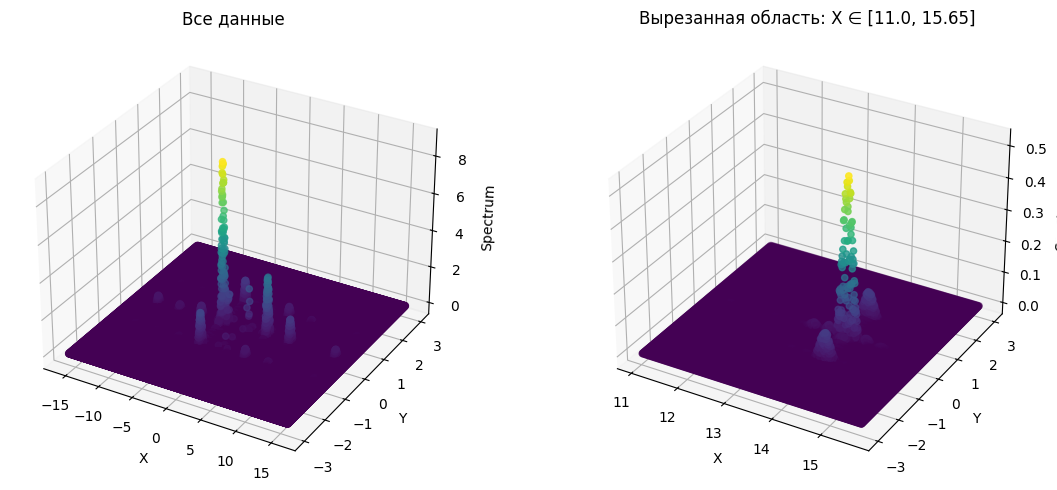

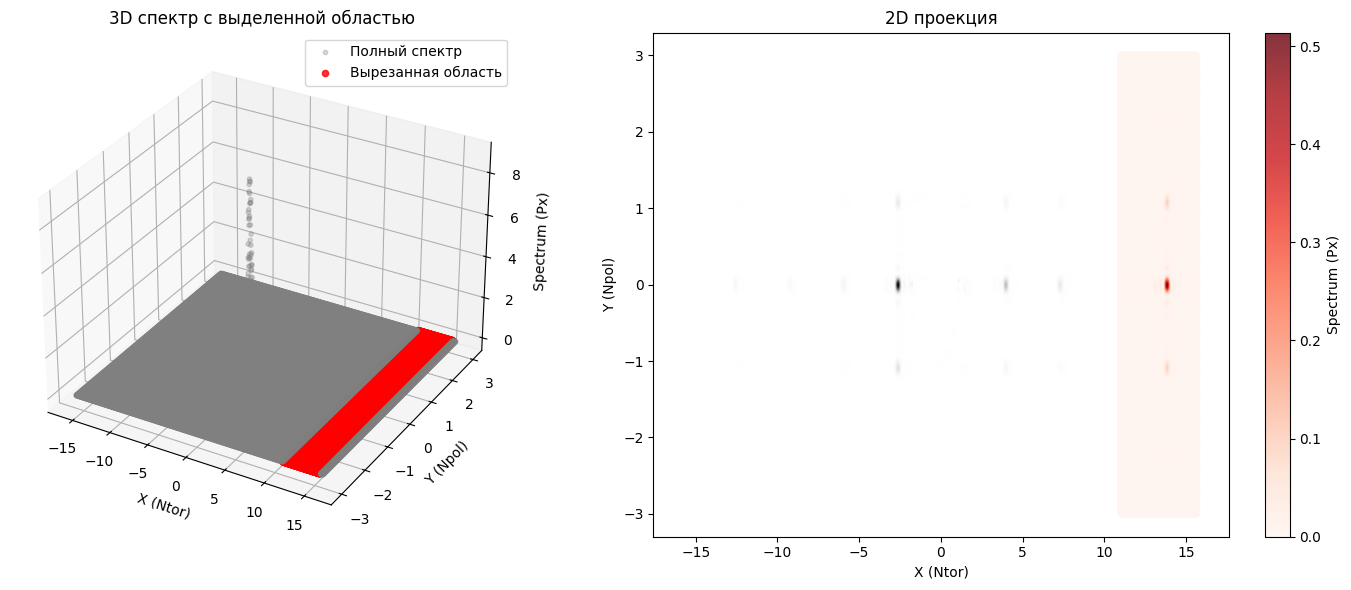

NameError: name 'Ntor' is not defined

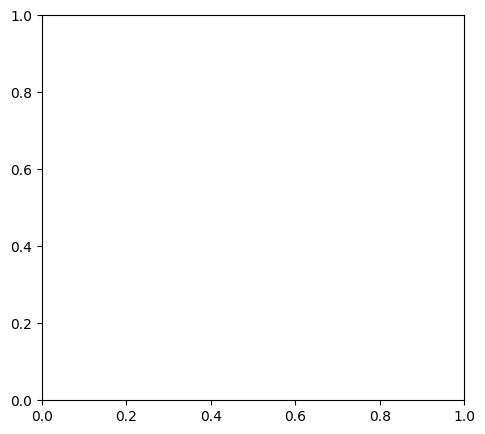

In [ ]:
if data.ndim == 2 and data.shape[1] >= 3:
    x = data[:, 0]  # первая координата
    y = data[:, 1]  # вторая координата  
    z = data[:, 2]  # значение спектра

    # Вырезаем область по X (аналогично 2D случаю)
    x_min, x_max = 11.0, 15.65
    mask_x = (x >= x_min) & (x <= x_max)
    
    # Применяем маску
    data_cut = data[mask_x]
    x_cut = data_cut[:, 0]
    y_cut = data_cut[:, 1]
    z_cut = data_cut[:, 2]

# Визуализация
fig = plt.figure(figsize=(12, 5))

# Полные данные
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(x, y, z, c=z, cmap='viridis')
ax1.set_title('Все данные')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Spectrum')

# Вырезанная область
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(x_cut, y_cut, z_cut, c=z_cut, cmap='viridis')
ax2.set_title(f'Вырезанная область: X ∈ [{x_min}, {x_max}]')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Spectrum')

plt.tight_layout()
plt.show()


# Разделяем данные на две группы
data_full = data[~mask_x]    # данные вне вырезанной области
data_cut = data[mask_x]      # вырезанная область

# Создаем фигуру с 3D проекцией
fig = plt.figure(figsize=(15, 6))

# 3D визуализация
ax1 = fig.add_subplot(121, projection='3d')

# Все данные серым цветом
sc1 = ax1.scatter(data_full[:, 0], data_full[:, 1], data_full[:, 2], 
                 c='gray', alpha=0.3, s=10, label='Полный спектр')

# Вырезанная область красным
sc2 = ax1.scatter(data_cut[:, 0], data_cut[:, 1], data_cut[:, 2], 
                 c='red', alpha=0.8, s=20, label='Вырезанная область')

ax1.set_xlabel('X (Ntor)')
ax1.set_ylabel('Y (Npol)')
ax1.set_zlabel('Spectrum (Px)')
ax1.set_title('3D спектр с выделенной областью')
ax1.legend()

# 2D проекция
ax2 = fig.add_subplot(122)
sc3 = ax2.scatter(data_full[:, 0], data_full[:, 1], c=data_full[:, 2], 
                 cmap='Greys', alpha=0.5, s=10)
sc4 = ax2.scatter(data_cut[:, 0], data_cut[:, 1], c=data_cut[:, 2], 
                 cmap='Reds', alpha=0.8, s=20)
ax2.set_xlabel('X (Ntor)')
ax2.set_ylabel('Y (Npol)')
ax2.set_title('2D проекция')
plt.colorbar(sc4, label='Spectrum (Px)')

plt.tight_layout()
plt.show()
